In [1]:
## load the data
data <- read.csv("reproductive_mode_TWISST.popGenwins.csv", header=TRUE)
data_no_2.1 <- read.csv("without_LGC2.1.csv", header=TRUE)
full <- read.csv("full_dlr.csv", header=TRUE)
library("Ternary")
library("dplyr")
library("scales") 
library("DescTools")
library("moments")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
######## a function to calculate Dlr
Dlr <- function(df){
    df_counts <- df %>% mutate(side = case_when(
    topo1 > topo2 ~ 'right',
    topo1 < topo2 ~ 'left'))
    
    
    counts <- as.data.frame(table(df_counts$side)) 
    left <-counts[1,2] 
    right <-counts[2,2]

    total <- right + left
    D_lr <- (left-(0.5*total))/(0.5*total)
    
    observed <- c(left,right)
    expected <- c(0.5,0.5)
    
    G <- GTest(x=observed,
      p=expected, 
      correct="none")
    
    G_pvalue <- G[3]
    
    out <-c("dlr" = D_lr, "Gtest_p" = G_pvalue, "nleft" = left, "n_right" = right)
    
    return(out)
}

In [3]:
### table shows number of wins in each category
head(data)
table(data$inv_status)

,X,scaffold,output_order,start,end,mid,win_size,sites,lnL,topoC_count,⋯,Fst_arcana_n_sax,Fst_arcana_spain,Fst_compressa_n_sax,Fst_compressa_spain,Fst_n_sax_spain,LG,av,LG_map_position,inv_status,in_map
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<chr>,<int>
1,13581,Contig142675,150625,17513,34303,29216,16790,100,NA,NA,⋯,0.0031,0.0153,0.0146,0.0611,0.0077,1,0.9655,1_0.9655,LGC1.1,1
2,79763,Contig49139,78790,73327,82524,77097,9197,100,NA,NA,⋯,0.0400,0.0862,0.0048,0.0245,0.0294,1,0.9655,1_0.9655,LGC1.1,1
3,79767,Contig49139,78789,70211,73311,72296,3100,100,NA,NA,⋯,0.0236,0.0487,0.0048,0.0307,0.0160,1,0.9655,1_0.9655,LGC1.1,1
4,103166,Contig56307,99627,4823,25906,16761,21083,100,NA,NA,⋯,0.0362,0.0488,-0.0011,0.0022,0.0051,1,0.9655,1_0.9655,LGC1.1,1
5,107273,Contig57904,103136,27621,36647,29490,9026,100,NA,NA,⋯,0.0124,0.0198,-0.0005,-0.0082,0.0073,1,0.9655,1_0.9655,LGC1.1,1
6,128238,Contig6901,28909,10563,20909,15778,10346,100,NA,NA,⋯,0.0498,0.0629,0.0162,0.0798,0.0191,1,0.9655,1_0.9655,LGC1.1,1



   buffer collinear    LGC1.1    LGC1.2   LGC10.1   LGC10.2   LGC11.1 LGC14.1/2 
     5197     60441      1238       156       154      2144       977      1328 
  LGC14.3   LGC17.1    LGC2.1    LGC4.1  LGC6.1/2    LGC7.1    LGC7.2    LGC9.1 
      495       360       383       879       511       331       191      1648 

In [4]:
data_in_map <- subset(data,in_map==1)

In [5]:
### number of windows on the genetic map 
sum(table(data_in_map$inv_status))

[1] 76433

In [6]:
#### number of windows in inverions 
sum(table(data_in_map$inv_status))-60441

[1] 15992

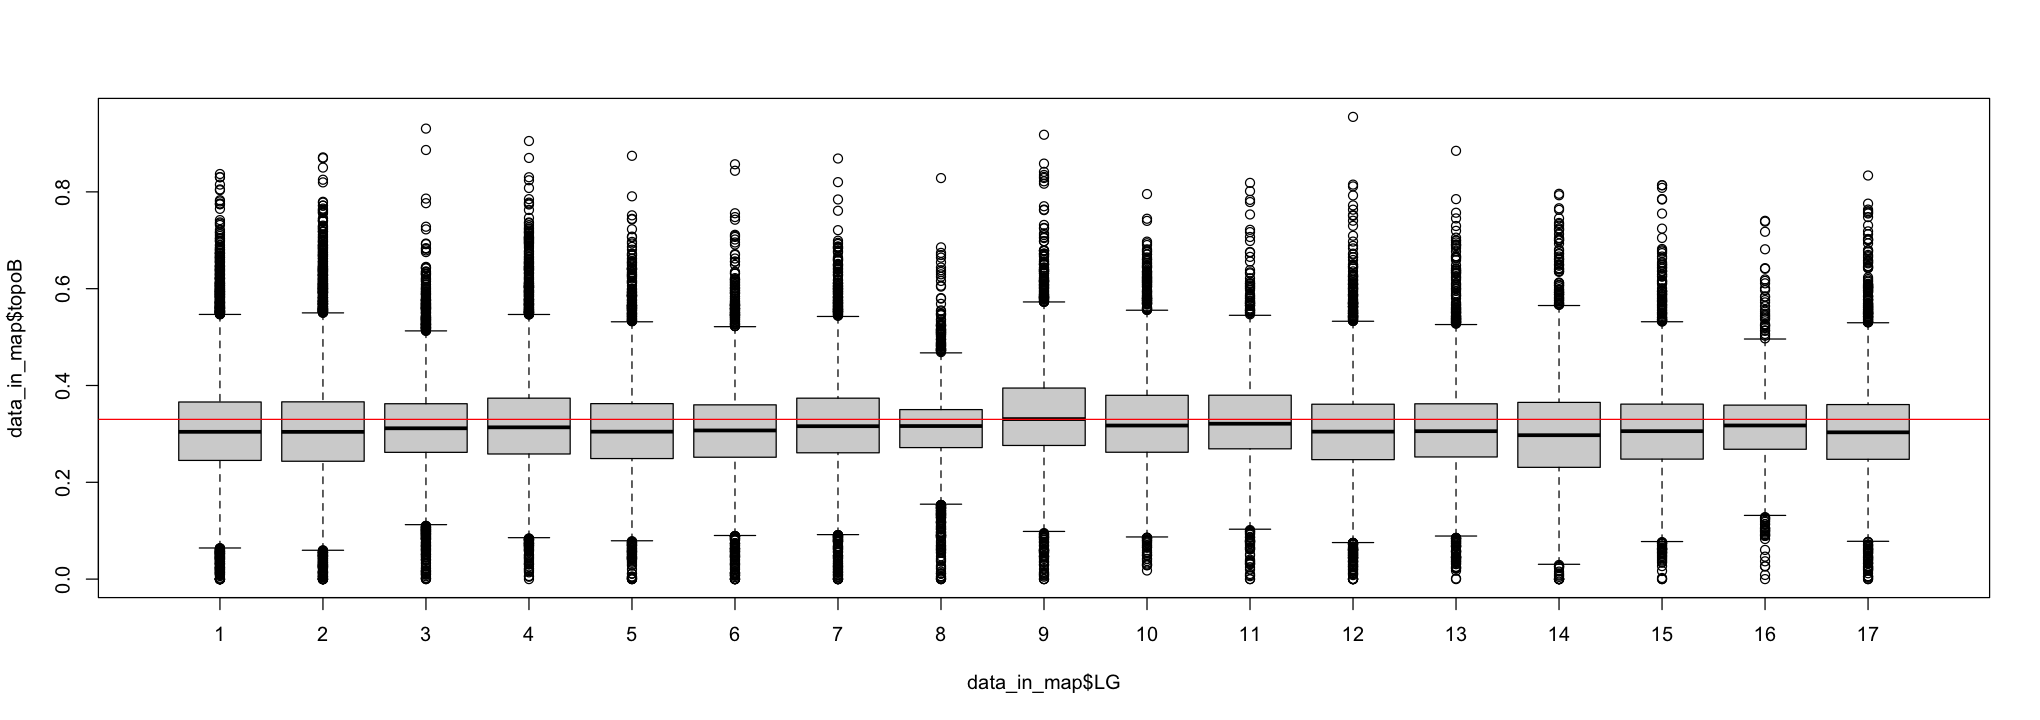

In [7]:
## TC by LG
library(repr)
options(repr.plot.width=17, repr.plot.height=6)
boxplot(data_in_map$topoB~data_in_map$LG)
abline(h=0.33, col="red")

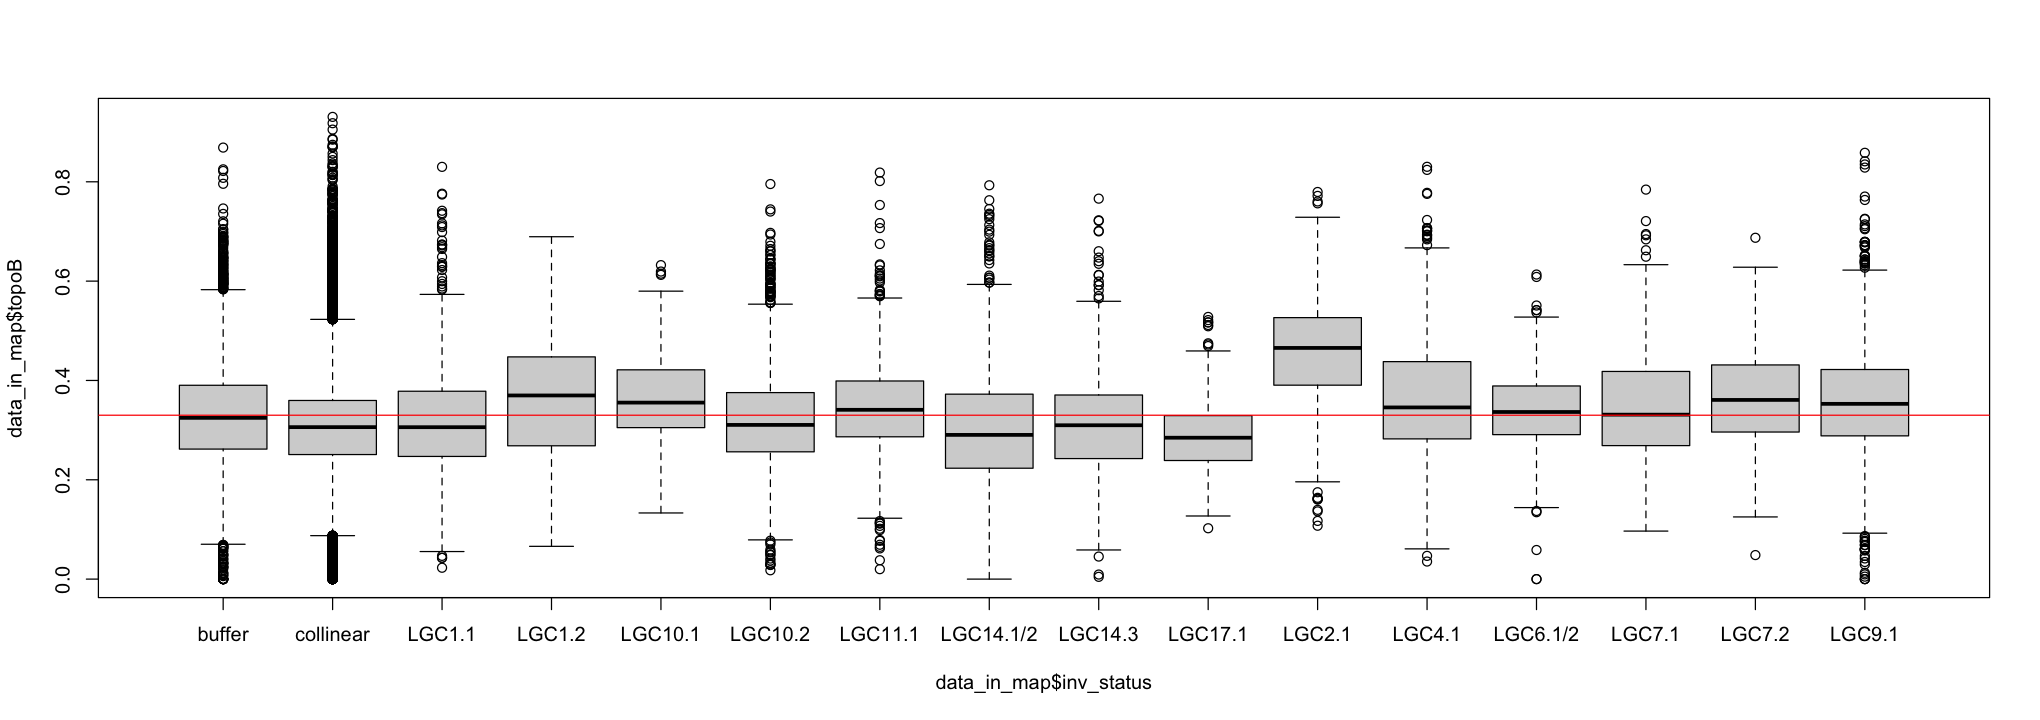

In [8]:
## TC by inversion 
library(repr)
options(repr.plot.width=17, repr.plot.height=6)
boxplot(data_in_map$topoB~data_in_map$inv_status)
abline(h=0.33, col="red")


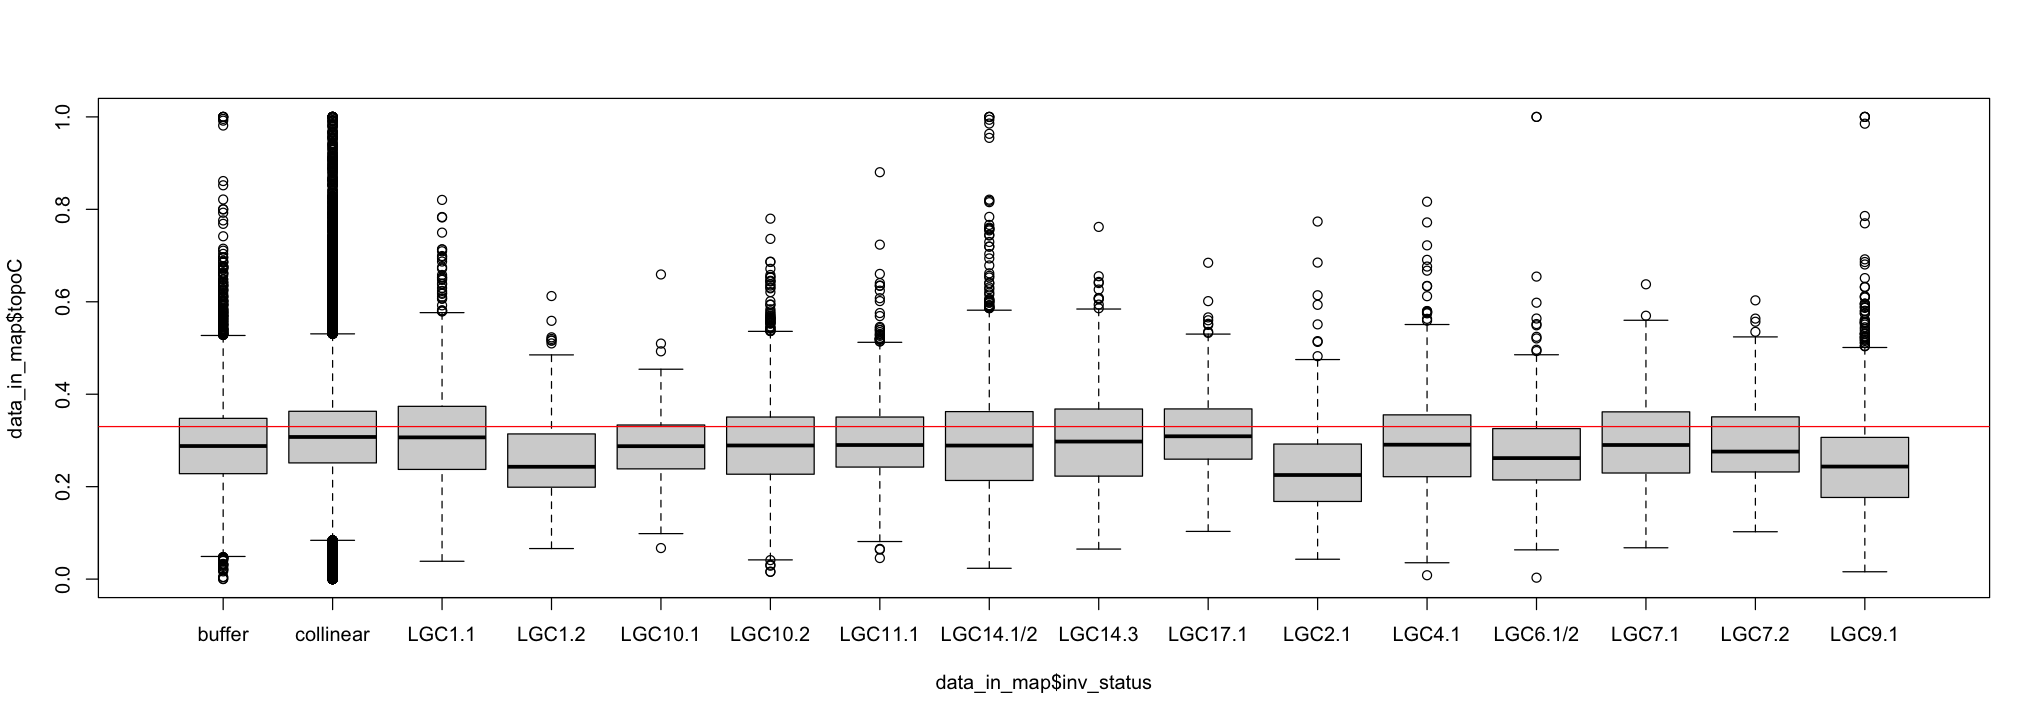

In [9]:
## TC by inversion 
library(repr)
options(repr.plot.width=17, repr.plot.height=6)
boxplot(data_in_map$topoC~data_in_map$inv_status)
abline(h=0.33, col="red")

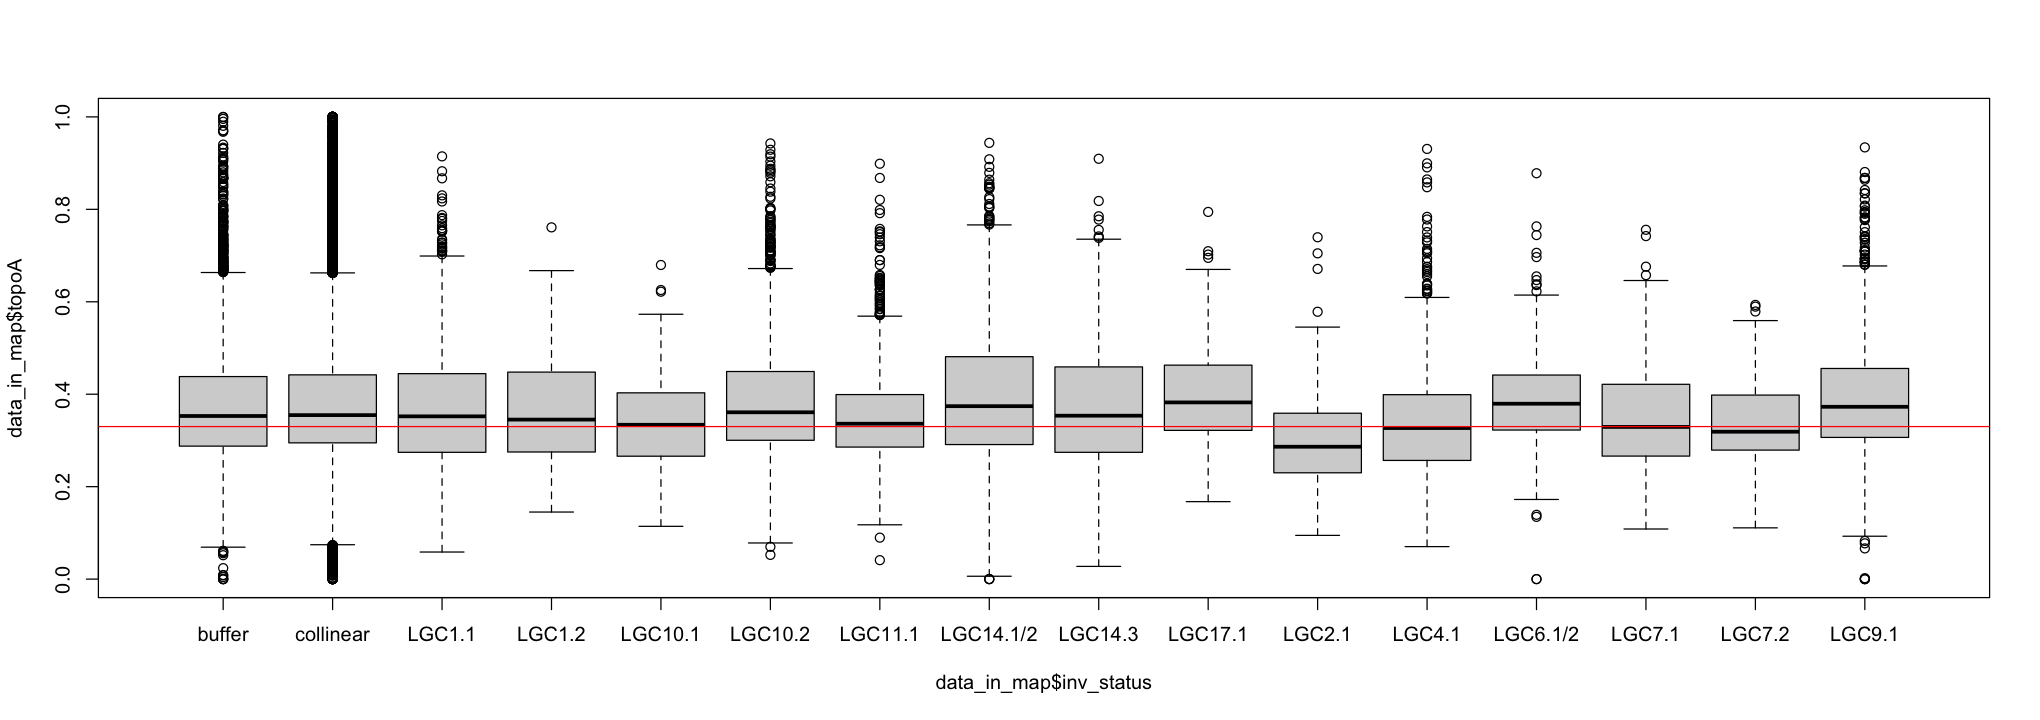

In [10]:
## TB by inversion 
library(repr)
options(repr.plot.width=17, repr.plot.height=6)
boxplot(data_in_map$topoA~data_in_map$inv_status)
abline(h=0.33, col="red")

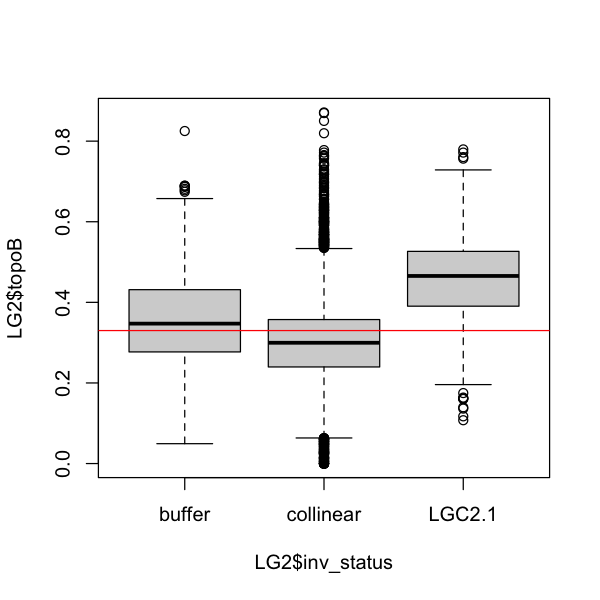

In [11]:
### zoom-in of 2.1

options(repr.plot.width=5, repr.plot.height=5)
LG2 <- subset(data_in_map,LG==2)
boxplot(LG2$topoB~LG2$inv_status)
abline(h=0.33, col="red")

In [12]:
LGC2.1 <- subset(data,inv_status=="LGC2.1")

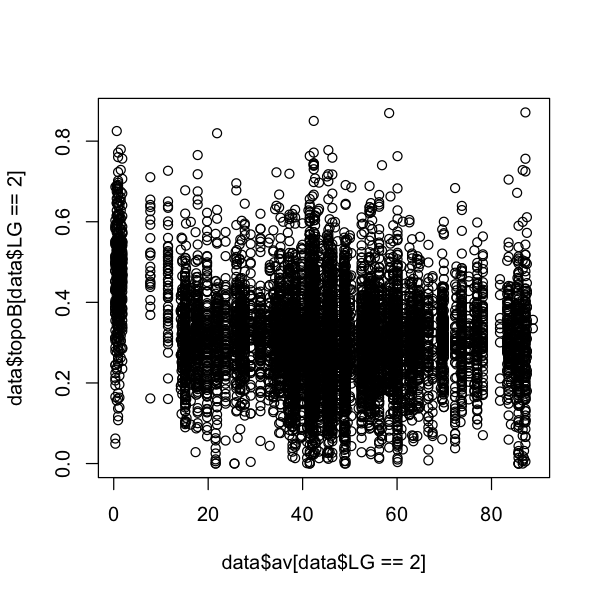

In [13]:
plot(data$av[data$LG==2],data$topoB[data$LG==2])

In [14]:
LGC2.1_weights <- LGC2.1 %>%
  select(topoC, topoA, topoB)
LGC2.1_weights<-na.omit(LGC2.1_weights)
colnames(LGC2.1_weights) <- c('topo3','topo2','topo1')

In [15]:
head(LGC2.1_weights)

,topo3,topo2,topo1
,<dbl>,<dbl>,<dbl>
1492,0.7736,0.1092,0.1172
2110,0.6848,0.1788,0.1364
3233,0.6141,0.2257,0.1602
3736,0.5934,0.2455,0.1611
5169,0.5511,0.1957,0.2532
7200,0.5149,0.1702,0.3149


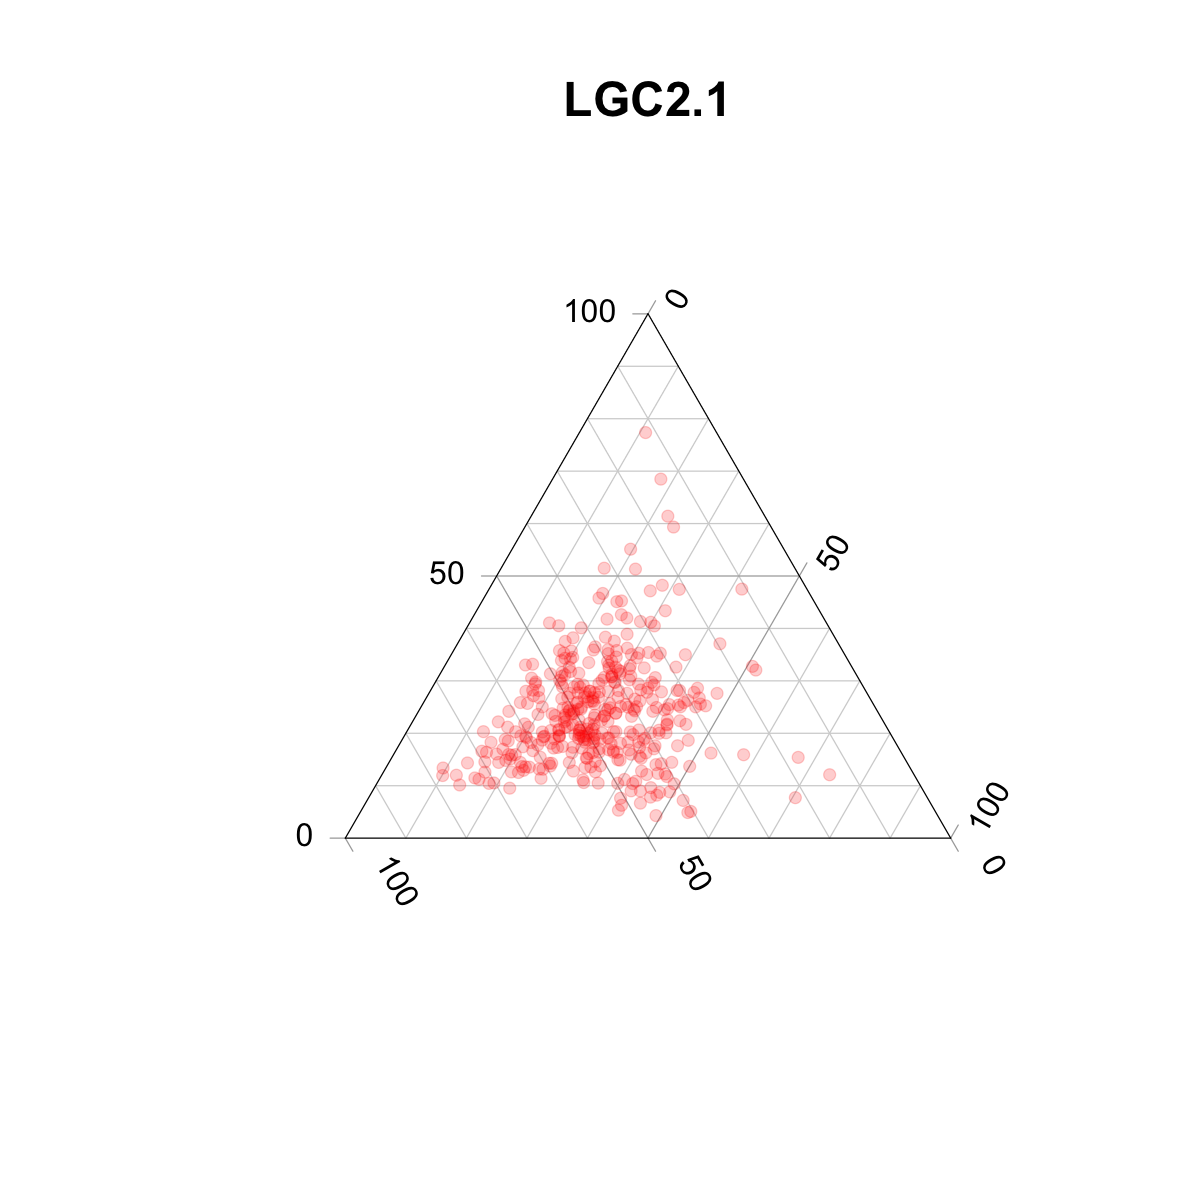

In [16]:
## Triangle plot for 2.1
library(repr)
options(repr.plot.width=10, repr.plot.height=10)
trans = 0.2
TernaryPlot(main="LGC2.1", cex=2, grid.lines = 2)
AddToTernary(points, LGC2.1_weights,cex=2, pch=20, col = alpha("red", trans ))

In [17]:
Dlr(LGC2.1_weights)

$dlr
[1] -0.6

$Gtest_p.p.value
     p.value 
1.016464e-33 

$nleft
[1] 76

$n_right
[1] 304

In [18]:
Dlr(full)

$dlr
[1] 0.03381856

$Gtest_p.p.value
     p.value 
3.173951e-40 

$nleft
[1] 79649

$n_right
[1] 74438

In [19]:
0.0338185570489399*100

[1] 3.381856

In [20]:
inv1 <- subset(data, inv_status=="LGC2.1")
inv1 <- inv1 %>%
  select(topoA, topoB, topoC)
inv1<-na.omit(inv1)
colnames(inv1) <- c('topo3','topo2','topo1')
head(inv1)

inv2 <- subset(data, inv_status=="LGC10.1")
inv2 <- inv2 %>%
  select(topoA, topoB, topoC)
inv2<-na.omit(inv2)
colnames(inv2) <- c('topo3','topo2','topo1')
head(inv2)

inv3 <- subset(data, inv_status=="LGC9.1")
inv3 <- inv3 %>%
  select(topoA, topoB, topoC)
inv3<-na.omit(inv3)
colnames(inv3) <- c('topo3','topo2','topo1')
head(inv3)

,topo3,topo2,topo1
,<dbl>,<dbl>,<dbl>
1492,0.1092,0.1172,0.7736
2110,0.1788,0.1364,0.6848
3233,0.2257,0.1602,0.6141
3736,0.2455,0.1611,0.5934
5169,0.1957,0.2532,0.5511
7200,0.1702,0.3149,0.5149


,topo3,topo2,topo1
,<dbl>,<dbl>,<dbl>
2426,0.2077,0.1332,0.6591
7619,0.1426,0.3478,0.5096
9031,0.2706,0.2366,0.4928
13444,0.1142,0.4317,0.4541
14465,0.2690,0.2836,0.4474
14542,0.3742,0.1789,0.4469


,topo3,topo2,topo1
,<dbl>,<dbl>,<dbl>
784,0.0000,0.0000,1.0000
785,0.0000,0.0000,1.0000
786,0.0000,0.0000,1.0000
891,0.0020,0.0127,0.9853
1426,0.1371,0.0773,0.7856
1509,0.1705,0.0598,0.7697


In [21]:
inversions <- subset(data, grepl("^LGC", inv_status))
inversions
data3 <- inversions %>%
  select(topoA, topoC, topoB)
data3<-na.omit(data3)
colnames(data3) <- c('topo3','topo2','topo1')

,X,scaffold,output_order,start,end,mid,win_size,sites,lnL,topoC_count,⋯,Fst_arcana_n_sax,Fst_arcana_spain,Fst_compressa_n_sax,Fst_compressa_spain,Fst_n_sax_spain,LG,av,LG_map_position,inv_status,in_map
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<chr>,<int>
1,13581,Contig142675,150625,17513,34303,29216,16790,100,NA,NA,⋯,0.0031,0.0153,0.0146,0.0611,0.0077,1,0.96550,1_0.9655,LGC1.1,1
2,79763,Contig49139,78790,73327,82524,77097,9197,100,NA,NA,⋯,0.0400,0.0862,0.0048,0.0245,0.0294,1,0.96550,1_0.9655,LGC1.1,1
3,79767,Contig49139,78789,70211,73311,72296,3100,100,NA,NA,⋯,0.0236,0.0487,0.0048,0.0307,0.0160,1,0.96550,1_0.9655,LGC1.1,1
4,103166,Contig56307,99627,4823,25906,16761,21083,100,NA,NA,⋯,0.0362,0.0488,-0.0011,0.0022,0.0051,1,0.96550,1_0.9655,LGC1.1,1
5,107273,Contig57904,103136,27621,36647,29490,9026,100,NA,NA,⋯,0.0124,0.0198,-0.0005,-0.0082,0.0073,1,0.96550,1_0.9655,LGC1.1,1
6,128238,Contig6901,28909,10563,20909,15778,10346,100,NA,NA,⋯,0.0498,0.0629,0.0162,0.0798,0.0191,1,0.96550,1_0.9655,LGC1.1,1
7,134273,Contig73180,126278,70792,79291,77209,8499,100,NA,NA,⋯,0.0403,0.0827,0.0246,0.1551,0.0427,1,0.96550,1_0.9655,LGC1.1,1
8,152098,Contig94473,140417,57727,62619,60208,4892,100,NA,NA,⋯,0.0913,0.1230,0.0102,0.0629,0.0268,1,0.96550,1_0.9655,LGC1.1,1
43,21343,Contig194205,153480,875,7821,3762,6946,100,NA,NA,⋯,0.0150,0.0134,0.0074,0.0324,0.0153,10,1.52350,10_1.5235,LGC10.1,1


In [22]:
Dlr(data3)

$dlr
[1] -0.2364991

$Gtest_p.p.value
      p.value 
6.665044e-134 

$nleft
[1] 4100

$n_right
[1] 6640

In [23]:
head(data3)

,topo3,topo2,topo1
,<dbl>,<dbl>,<dbl>
773,0,1,0
774,0,1,0
775,0,1,0
781,0,1,0
782,0,1,0
784,0,1,0


In [24]:
pdf("top_3_inv_tc_3plots.pdf", width = 10, height = 14) 
library(repr)
par(mfrow=c(1,3),mar = c(0.3, 0.3, 0.3, 0.3))
options(repr.plot.width=6, repr.plot.height=6)
trans = 0.1
TernaryPlot(main="LGC9.1", cex=1.5, grid.lines = 2)
AddToTernary(points, inv3,cex=2, pch=0, col = alpha("gray40",0.25))
TernaryPlot(main="LGC10.1", cex=1.5, grid.lines = 2)
AddToTernary(points, inv2,cex=2, pch=2, col = alpha("red",0.25))
TernaryPlot(main="LGC2.1", cex=1.5, grid.lines = 2)
AddToTernary(points, inv1,cex=2, pch=1, col = alpha("blue",0.25))
dev.off()

pdf 
  2

In [25]:
inversions <- subset(data, grepl("^LGC", inv_status))
inv_list <- unique(inversions$inv_status)
inv_list

[1] "LGC1.1"    "LGC10.1"   "LGC10.2"   "LGC11.1"   "LGC14.1/2" "LGC14.3"  
 [7] "LGC17.1"   "LGC2.1"    "LGC6.1/2"  "LGC7.1"    "LGC9.1"    "LGC4.1"   
[13] "LGC1.2"    "LGC7.2"

In [26]:
length(data$start)

[1] 154971

In [27]:
inversions <- subset(data, grepl("^LGC", inv_status))
inv_list <- sort(unique(inversions$inv_status))
inv_list

for(i in inv_list) {
    
inv <- subset(data, inv_status==i)
inv <- inv %>%
  select(topoA, topoB, topoC)
inv<-na.omit(inv)
colnames(inv) <- c('topo3','topo2','topo1')

print(Dlr(inv))
    
}

[1] "LGC1.1"    "LGC1.2"    "LGC10.1"   "LGC10.2"   "LGC11.1"   "LGC14.1/2"
 [7] "LGC14.3"   "LGC17.1"   "LGC2.1"    "LGC4.1"    "LGC6.1/2"  "LGC7.1"   
[13] "LGC7.2"    "LGC9.1"

$dlr
[1] 0.03908795

$Gtest_p.p.value
  p.value 
0.1707097 

$nleft
[1] 638

$n_right
[1] 590

$dlr
[1] 0.474359

$Gtest_p.p.value
     p.value 
1.484839e-09 

$nleft
[1] 115

$n_right
[1] 41

$dlr
[1] 0.503268

$Gtest_p.p.value
     p.value 
1.887313e-10 

$nleft
[1] 115

$n_right
[1] 38

$dlr
[1] 0.1433927

$Gtest_p.p.value
     p.value 
3.234176e-11 

$nleft
[1] 1220

$n_right
[1] 914

$dlr
[1] 0.30793

$Gtest_p.p.value
     p.value 
3.892687e-22 

$nleft
[1] 635

$n_right
[1] 336

$dlr
[1] 0.06202723

$Gtest_p.p.value
   p.value 
0.02407114 

$nleft
[1] 702

$n_right
[1] 620

$dlr
[1] 0.07755102

$Gtest_p.p.value
   p.value 
0.08588288 

$nleft
[1] 264

$n_right
[1] 226

$dlr
[1] -0.2178771

$Gtest_p.p.value
     p.value 
3.487921e-05 

$nleft
[1] 140

$n_right
[1] 218

$dlr
[1] 0.8057743

$Gtest_p.p.value
     p.value 
5.166226e-64 

$nleft
[1] 344

$n_right
[1] 37

$dlr
[1] 0.2787258

$Gtest_p.p.value
    p.value 
8.89366e-17 

$nleft
[1] 562

$n_right
[1] 317

$dlr
[1] 0.4381139

In [28]:
dlr_inv <- read.csv("dlr_by_inversion.csv",header=TRUE)

In [29]:
dlr_inv

Inversion,DLR,p.value,left,right,total,absDlr,ord
<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<int>
LGC1.1,0.03908795,1.707097e-01,638,590,1228,0.03908795,1
LGC14.1.5,0.06202723,2.407114e-02,702,620,1322,0.06202723,2
LGC14.3,0.07755102,8.588288e-02,264,226,490,0.07755102,3
LGC10.2,0.14339270,3.230000e-11,1220,914,2134,0.14339270,4
LGC7.1,0.16463410,2.803944e-03,191,137,328,0.16463410,5
LGC17.1,-0.21787710,3.490000e-05,140,218,358,0.21787710,6
LGC4.1,0.27872580,8.890000e-17,562,317,879,0.27872580,7
LGC11.1,0.30793000,3.890000e-22,635,336,971,0.30793000,8
LGC7.2,0.39267020,3.780000e-08,133,58,191,0.39267020,9


In [30]:
pdf("variableSplitTimes.pdf", width = 10, height = 14) 
library(repr)
options(repr.plot.width=6, repr.plot.height=8)
plot(dlr_inv$DLR, dlr_inv$ord, xlim=c(1,-1), pch=20, cex=2, xlab="Dlr", ylab="Inversion")
abline(v=0)
dev.off() 

pdf 
  2

In [31]:
### plot PCA for inversion 2.1

pca2.1 <- read.csv("LGC2.1_inversion_frequency.csv",header=TRUE)
head(pca2.1)

,Row.names,Axis1,Axis2,Axis3,genotype,species,sp_code,points,ecotype,country,⋯,X,geno,sp,count,X.1,X.2,A,R,prop,R.1
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<lgl>,<chr>,<chr>,<int>,<lgl>,<chr>,<int>,<int>,<dbl>,<dbl>
1,AMB_5_3,3.073540,1.16340442,1.704628205,RA,L. arcana,blue,A,Wave,England,⋯,NA,AA,L. arcana,3,NA,arcana,11,39,0.2200000,0.7800000
2,BH_10_1,11.205940,-0.56631255,0.005164465,RR,L. arcana,blue,A,Wave,Wales,⋯,NA,RA,L. arcana,5,NA,comp,7,1,0.8750000,0.1250000
3,NE_E1_367_La,-7.203897,-0.74094840,1.493543269,AA,L. arcana,blue,A,Wave,England,⋯,NA,RR,L. arcana,17,NA,sax,106,28,0.7910448,0.2089552
4,NE_E2_140_La,11.578199,-0.51400333,2.351591499,RR,L. arcana,blue,A,Wave,England,⋯,NA,AA,L. compressa,3,NA,sax_spain,10,14,0.4166667,0.5833333
5,NE_E2_158_La,2.510040,0.46463071,2.334138122,RA,L. arcana,blue,A,Wave,England,⋯,NA,RA,L. compressa,1,NA,,NA,NA,NA,NA
6,NE_E2_410_La,11.138919,0.05655881,2.586459247,RR,L. arcana,blue,A,Wave,England,⋯,NA,RR,L. compressa,0,NA,,NA,NA,NA,NA


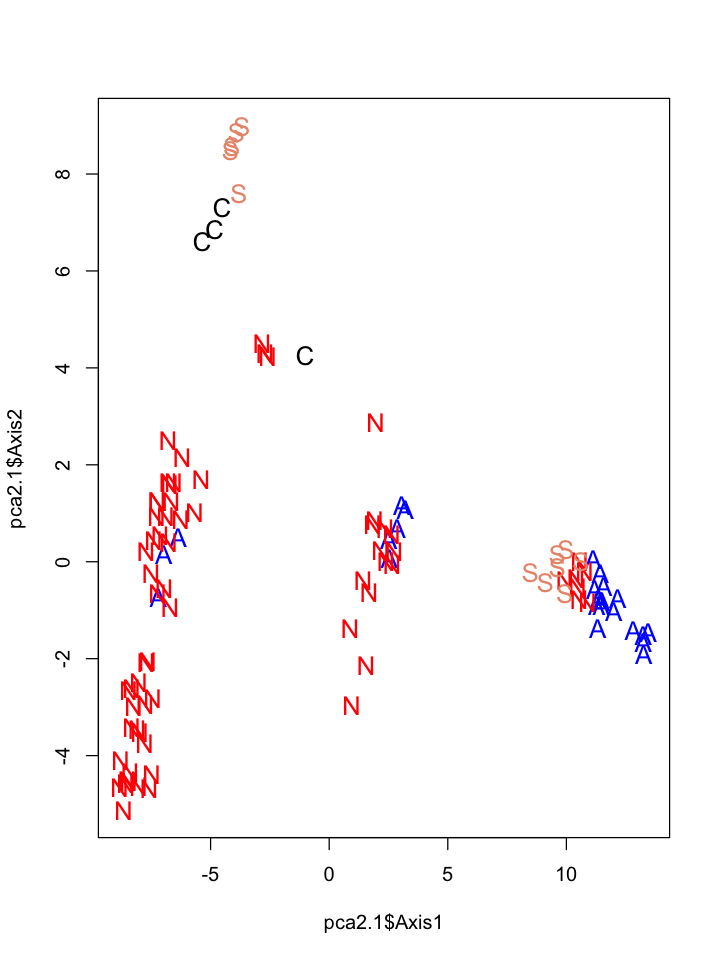

In [32]:
#pdf("2.1_PCA.pdf", width = 5, height = 5)
plot(pca2.1$Axis1,pca2.1$Axis2, col=pca2.1$sp_code, pch=pca2.1$points, cex=1.3)
#dev.off()

In [33]:
as.data.frame(table(pca2.1$genotype,pca2.1$species))

Var1,Var2,Freq
<fct>,<fct>,<int>
AA,L. arcana,3
RA,L. arcana,5
RR,L. arcana,17
AA,L. compressa,3
RA,L. compressa,1
RR,L. compressa,0
AA,L. saxatilis,46
RA,L. saxatilis,14
RR,L. saxatilis,7
